In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
import statsmodels.api as sm

In [7]:
%matplotlib inline

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
from sklearn.feature_selection import RFE

In [11]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [12]:
from sklearn.svm import LinearSVC

In [13]:
from sklearn.feature_selection import SelectFromModel

In [14]:
from sklearn import metrics

In [15]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
import math

In [ ]:
df = pd.read_csv('../../data/extracted_features_round4_training.csv', header=0)

In [37]:
df = df.drop(columns='Unnamed: 0')

In [ ]:
#df = df[['CV', 'TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TABSSIMBERT', 'AKWPWMEAN',
#       'TAWSSIMPSPACY', 'TKWAORATIO', 'TAKWSIMSPACY', 'TMIKWP', 'TABSSIMSPACY',
#       'TAFSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TKWAOWRATIO', 'TAFSSD']]

In [20]:
scaler = StandardScaler()

In [38]:
X = df.drop(columns='CV')

In [39]:
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns,index = df.index)

In [40]:
y = df['CV']

In [41]:
df.columns

Index(['CV', 'TL', 'AL', 'TWC', 'AWC', 'TSC', 'ASC', 'TALRATIO', 'TAWCRATIO',
       'TASCRATIO', 'TP', 'AP', 'TAPD', 'TAPMEAN', 'TS', 'AS', 'TASD',
       'TASMEAN', 'TASCCRATIO', 'TASCCD', 'TKWC', 'AKWC', 'TAKWCRATIO',
       'AMIKWP', 'TMIKWS', 'AMIKWS', 'AFSP', 'TAFSPMEAN', 'TAFSPD', 'AFSS',
       'TAFSSMEAN', 'TAFSSD', 'TMIKWAORATIO', 'TKWAORATIO', 'TKWAOWRATIO',
       'TKWPMEAN', 'AKWPMEAN', 'TAKWPMEAN', 'TAKWPD', 'TKWPWMEAN', 'AKWPWMEAN',
       'TAKWPWMEAN', 'TAKWPWD', 'TAMIKWFP', 'TAMIKWDIST', 'TAKWDIST',
       'TASIMSPACY', 'TABSSIMSPACY', 'TAWSSIMSPACY', 'TAASSIMSPACY',
       'TAFSSIMSPACY', 'TABSSIMPSPACY', 'TAWSSIMPSPACY', 'TAGSSIMRATIOSPACY',
       'TVC', 'AVC', 'TAVCD', 'TNC', 'ANC', 'TANCD', 'TABSSIMBERT',
       'TAWSSIMBERT', 'TAASSIMSBERT', 'TAFSSIMBERT', 'TABSSIMPBERT',
       'TAWSSIMPBERT', 'TAGSSIMRATIOBERT', 'TAMIKWASSIMSPACY',
       'TAMIKWBSSIMSPACY', 'TAMIKWWSSIMSPACY', 'TMIKWP', 'TAMKWSSIMSPACY',
       'TAMKWSP', 'TAMKWSPD', 'TAMKWSS', 'TAMKWSSD', 'TA

In [119]:
cor = df.corr()

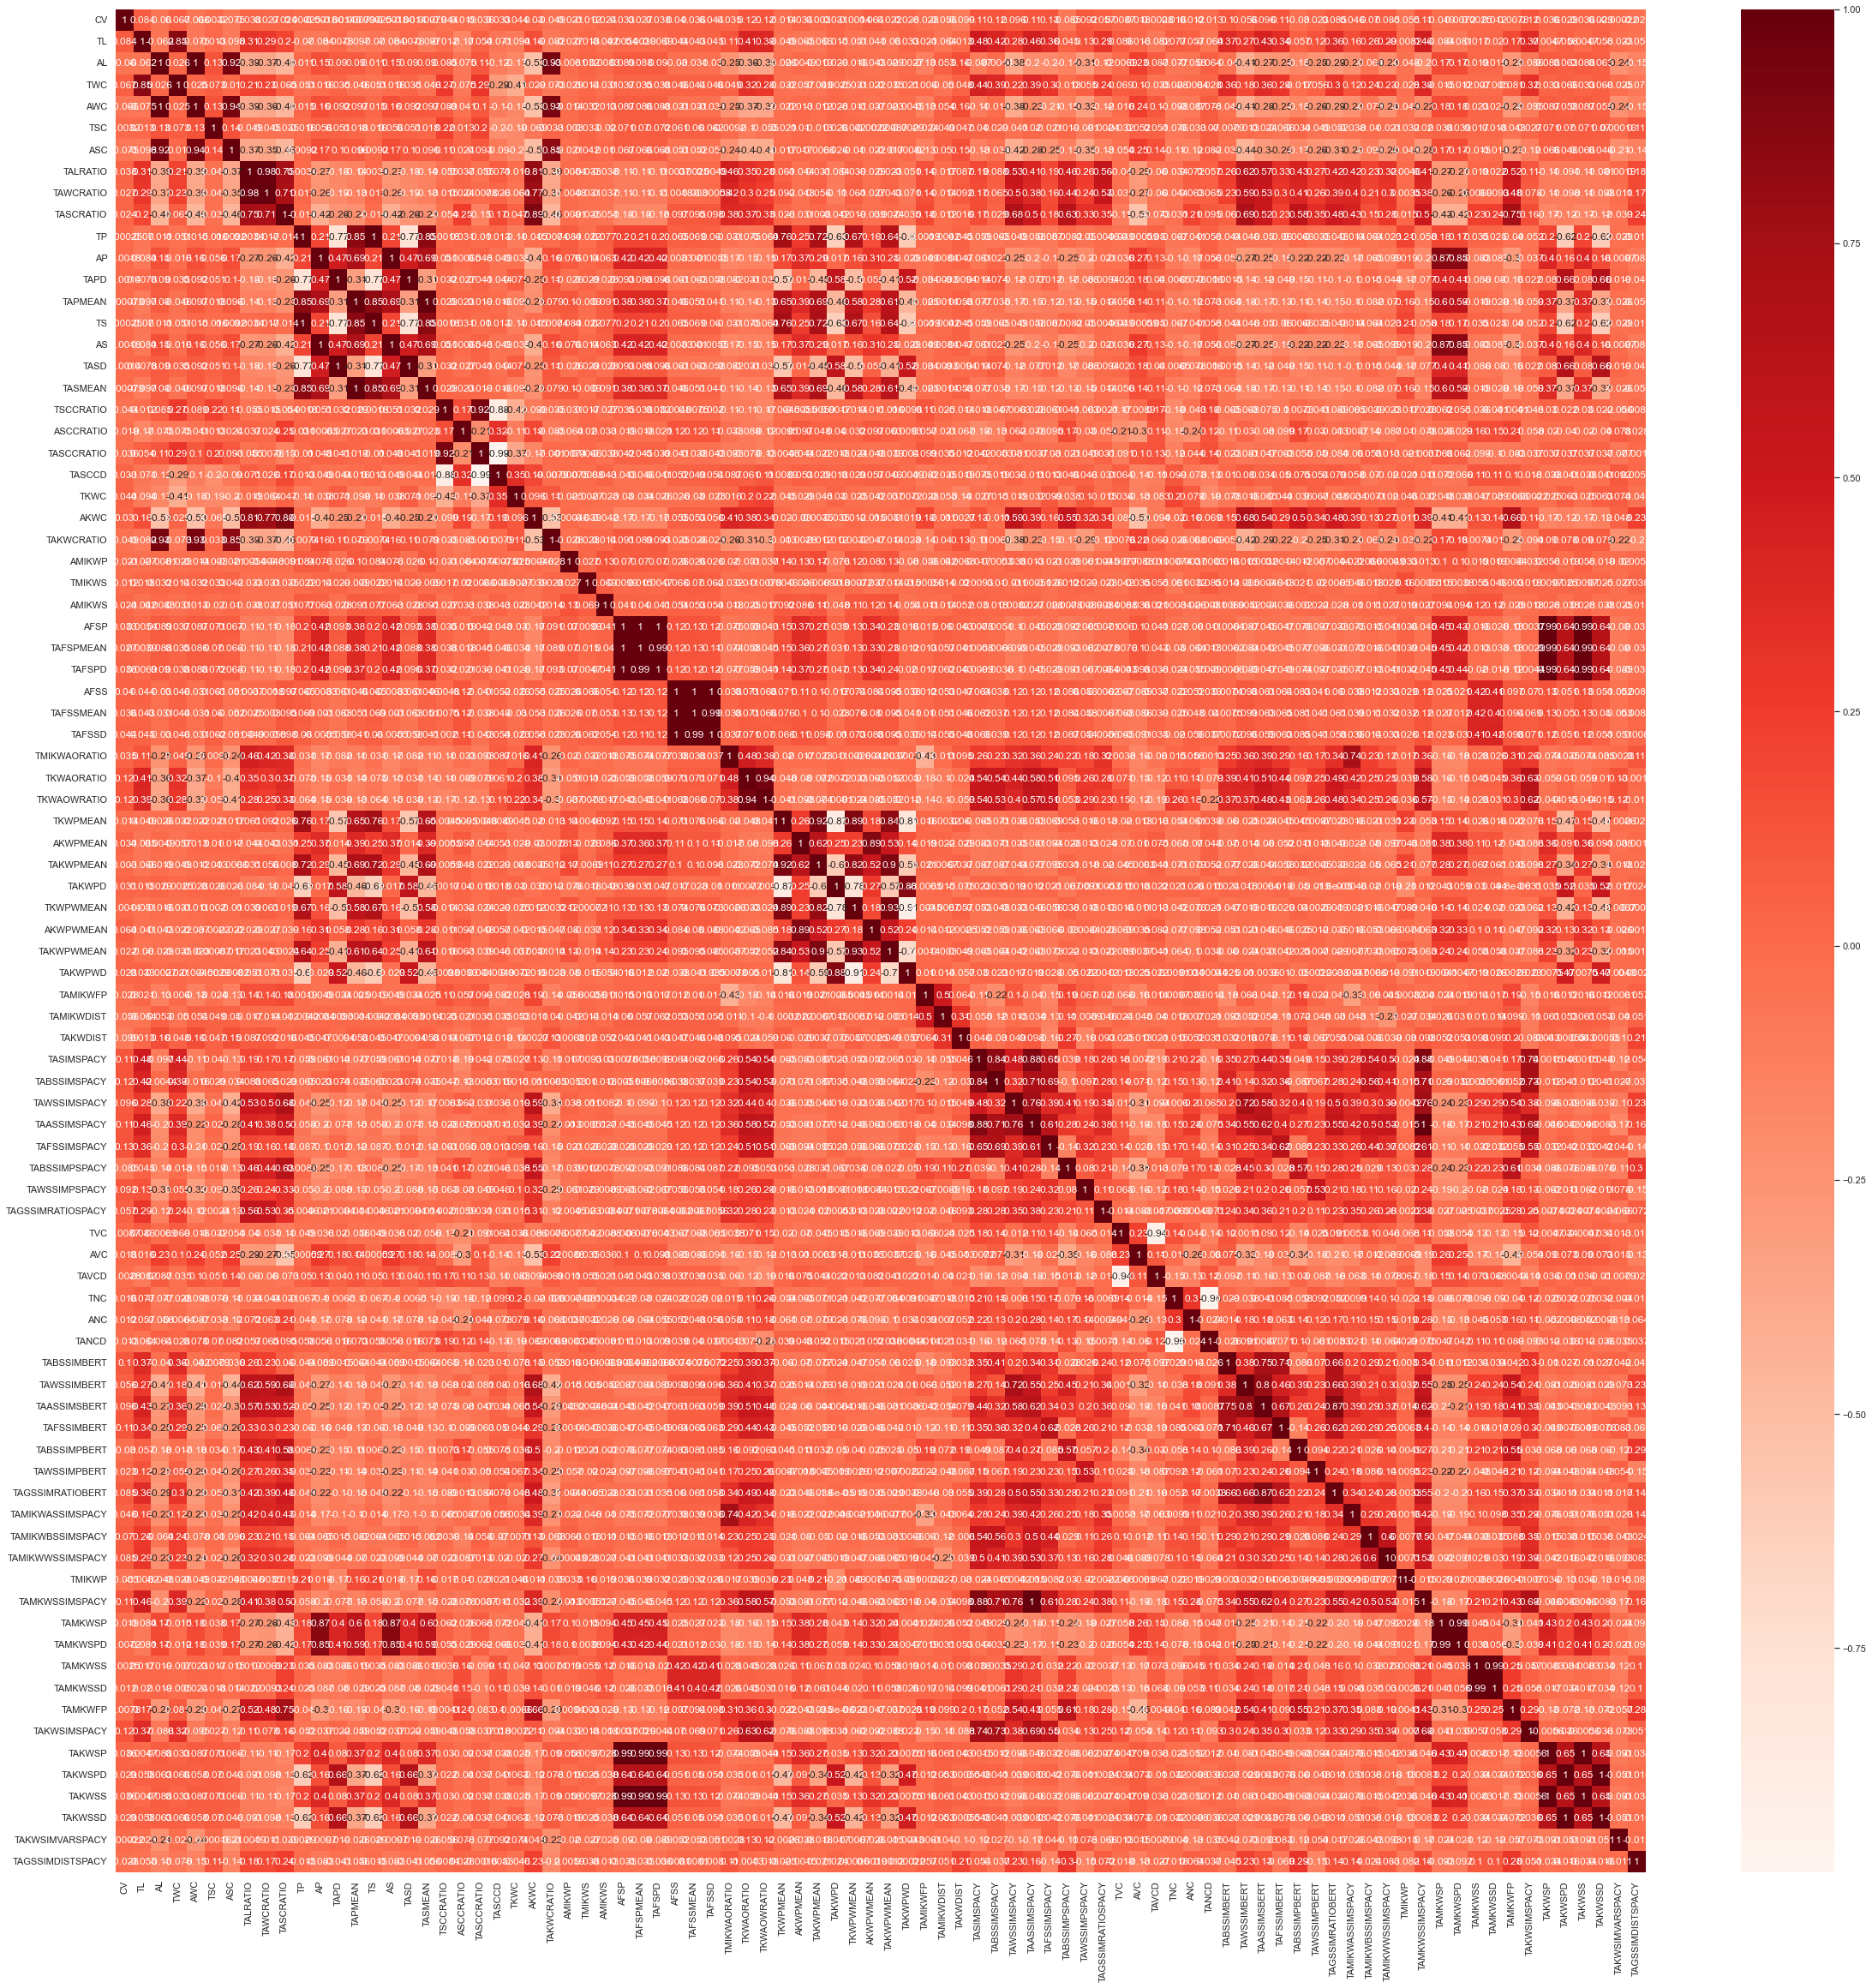

In [120]:
sns.set(rc = {'figure.figsize':(40,40)})
plot = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)

In [494]:
fig = plot.get_figure()

In [495]:
fig.savefig('correlation_heatmap_round1.png')

In [496]:
plt.savefig('mp.png')

<Figure size 576x1080 with 0 Axes>

In [42]:
reg = LassoCV(cv=10)

In [43]:
reg.fit(X, y)

LassoCV(cv=10)

In [44]:
print("Best alpha: %f" % reg.alpha_)
print("Best r2 score: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)
print("Lasso picked " + str(sum(coef != 0)) + " features and eliminated the other " +  str(sum(coef == 0)) + " features")
#cross_val_score(reg, X, y, cv=10).mean()

Best alpha: 0.021250
Best r2 score: 0.049053
Lasso picked 15 features and eliminated the other 70 features


In [45]:
imp_coef = coef.sort_values()

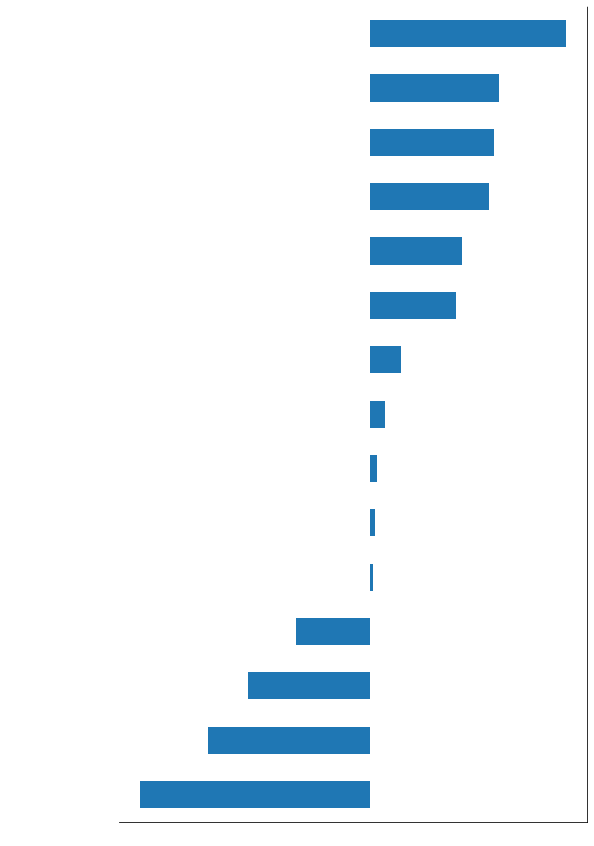

In [46]:
matplotlib.rcParams['figure.figsize'] = (10.0, 15.0)
ax = imp_coef[imp_coef!=0].plot(kind = "barh")
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.patch.set_alpha(0)

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')
plt.gcf().subplots_adjust(left=0.25)
fig = ax.get_figure()
fig.savefig('../../images/lasso_features.png', transparent=True)

In [47]:
imp_coef_abs = coef.abs().sort_values(ascending=False)
imp_coef_abs[imp_coef_abs!=0].keys()

Index(['TABSSIMPSPACY', 'TAWSSIMSPACY', 'TAKWDIST', 'TABSSIMBERT',
       'TAWSSIMPSPACY', 'TP', 'AKWPWMEAN', 'TKWAORATIO', 'TABSSIMSPACY',
       'TMIKWP', 'TAMIKWWSSIMSPACY', 'TAFSSD', 'TAFSSIMSPACY', 'TAKWSPD',
       'TAFSPD'],
      dtype='object')

In [48]:
pred = reg.predict(X)

In [49]:
['CV', 'TL', 'AL', 'TABSIMSPACY', 'TAKWDIST', 'TAWSSIMSPACY', 'TABSIMBERT', 'AMIKWP']

['CV',
 'TL',
 'AL',
 'TABSIMSPACY',
 'TAKWDIST',
 'TAWSSIMSPACY',
 'TABSIMBERT',
 'AMIKWP']

In [50]:
reg.score(X,y)

0.0490529989560482

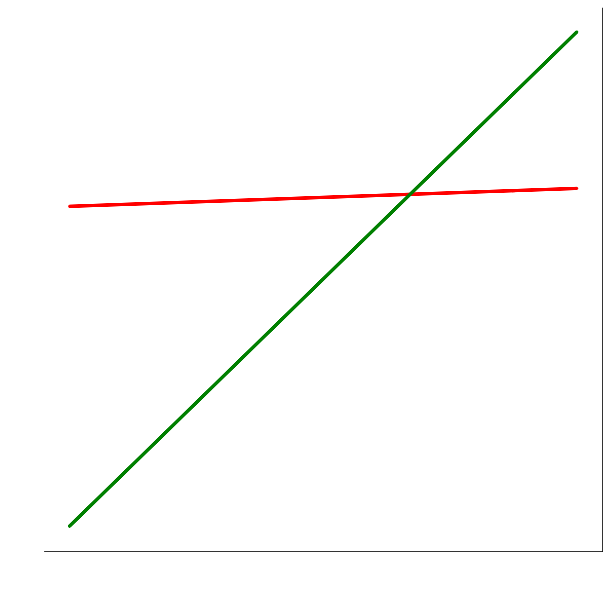

In [51]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.scatter(y, pred,  color='white', alpha=0.3, s=100)
m, b = np.polyfit(y, pred, 1)
ax.plot(y, m*y+b, color='red', linewidth=3)
ax.plot(y, y, color='green', linewidth=3)
plt.xlabel("Actual")
plt.ylabel("Prediction")

ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

ax.spines['left'].set_color('white')
ax.spines['top'].set_color('white')

plt.savefig('../../images/final_model.png', transparent=True)

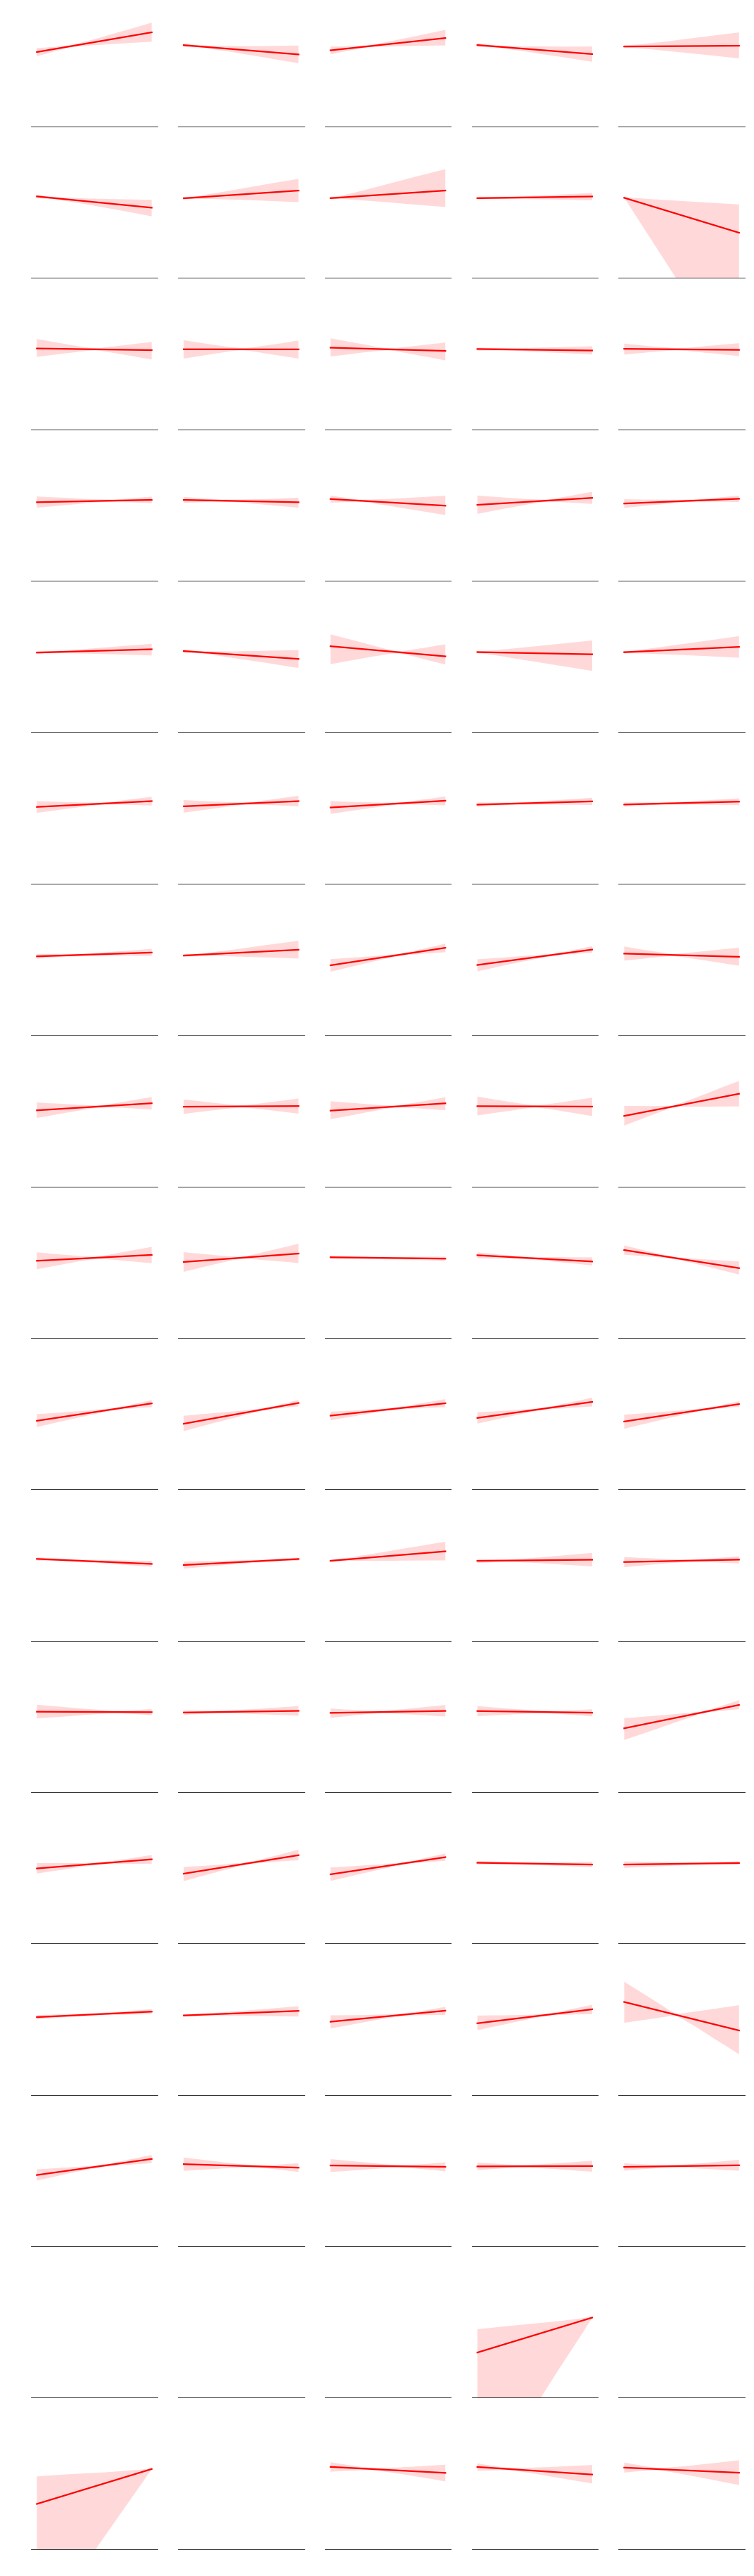

In [52]:
y_name = 'CV'
features_names = [f'{i}' for i in X.columns]  
column_names = features_names + [y_name]

plot_size=7
num_plots_x=5   # No. of plots in every row
num_plots_y = math.ceil(len(features_names)/num_plots_x)   # No. of plots in y direction

g = sns.FacetGrid(pd.DataFrame(features_names), col=0, col_wrap=5, sharex=False)
for ax, x_var in zip(g.axes, features_names):
    ax.set(ylim=(1, 5))
    sns.regplot(data=df, x=x_var, y=y_name, ax=ax, scatter_kws={"color": "white", "alpha" : 0.1}, line_kws={"color": "red"})
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')

    ax.tick_params(axis='x', colors='white')
    ax.tick_params(axis='y', colors='white')

    ax.spines['left'].set_color('white')
    ax.spines['top'].set_color('white')
g.tight_layout()
fig = g.fig
fig.savefig('../../images/feature_regression.png', transparent=True)

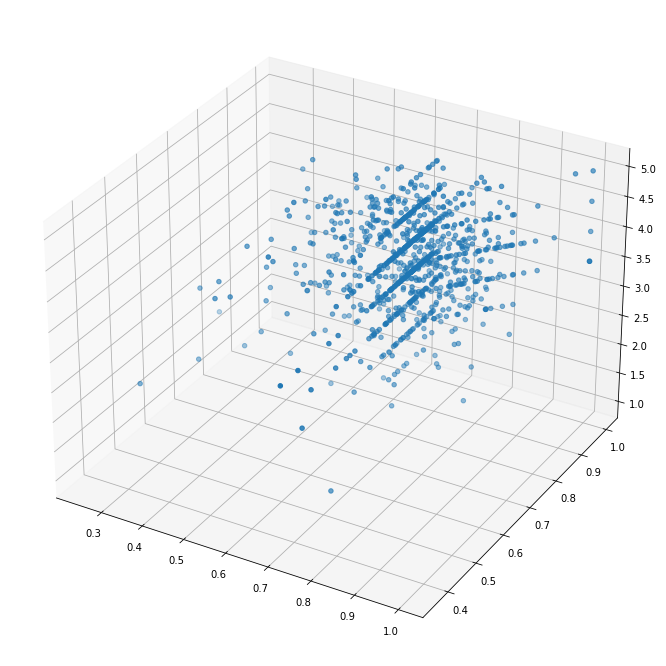

In [53]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals = df['TAMIKWWSSIMSPACY']
sequence_containing_y_vals = df['TABSSIMSPACY']
sequence_containing_z_vals = df['CV']

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()